## Проект 2. Оськин Максим Сергеевич. Группа БГЕО 232

Как и в прошлом домашнем задании, буду делать через Google Colab, дополнительно применяя pandas для работы с датасетами. Для графиков решил, что буду использовать популярную библиотеку matplotlib

Подключим заранее библиотеки для более удобной работы (список библиотек снизу буду обновлять по мере прохождения заданий):

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from PIL import Image
from IPython.display import Image

Буду использовать датасет, связанный со льдом на Марсе. Я заранее скачал его на сайте, загрузил файл на Dropbox, теперь буду его скачивать по ссылке, чтобы он уже был во временном хранилище:

In [2]:
!wget  -O 'spicam_obs.csv' -q 'https://www.dropbox.com/scl/fi/44xpkuqpcx7tmyuvpizhw/spicam_obs.csv?rlkey=zxktbo64qvlgqstmn1gkd9ze0&st=abpjs261&dl=0'

С помощью такого скрипта не нужно будет постоянно выгружать файлик вручную, если сессия в Google Colab сбрасывается

Теперь посмотрим, что мы скачали:

In [3]:
df = pd.read_csv('spicam_obs.csv')
df

,orbit,spec_num,lat,lon,ls,local_time,incidence,alt_spc,co2ice_index,h2oice_index,snr,martian_year
0,SPIM_1BR_01000A02_N,1,86.313330,273.506700,107.635,10.92000,62.57000,2677.5000,0.000000,0.522669,69.33311,27
1,SPIM_1BR_01000A02_N,2,86.260000,275.630000,107.635,11.06000,62.49000,2668.1670,0.000000,0.487354,76.17016,27
2,SPIM_1BR_01000A02_N,3,86.210000,277.703300,107.635,11.20000,62.40000,2658.8000,0.000000,0.447733,76.59061,27
3,SPIM_1BR_01000A02_N,4,86.150000,279.720000,107.635,11.33667,62.32000,2649.5000,0.000000,0.406881,69.82737,27
4,SPIM_1BR_01000A02_N,5,86.080000,281.676700,107.635,11.47000,62.23333,2640.1000,0.000000,0.374136,67.71943,27
...,...,...,...,...,...,...,...,...,...,...,...,...
1162601,SPIM_1BR_22045A01_N,482,1.973333,9.530000,57.591,16.27000,65.18000,626.9000,-0.343695,0.020678,52.52060,35
1162602,SPIM_1BR_22045A01_N,483,1.640000,9.523334,57.591,16.27333,65.33000,632.1667,0.668904,0.009653,68.52110,35
1162603,SPIM_1BR_22045A01_N,484,1.300000,9.520000,57.591,16.28000,65.48000,637.4667,-0.222833,0.016983,54.98575,35
1162604,SPIM_1BR_22045A01_N,486,0.630000,9.503333,57.591,16.28000,65.77000,648.2000,-0.381484,0.006694,60.28332,35


Выборка что-то очень большая, но это и хорошо, так как полученные результаты будут более презентабельными

Рассмотрим, что за столбцы в нашем датасете:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162606 entries, 0 to 1162605
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   orbit         1162606 non-null  object 
 1   spec_num      1162606 non-null  int64  
 2   lat           1162606 non-null  float64
 3   lon           1162606 non-null  float64
 4   ls            1162606 non-null  float64
 5   local_time    1162606 non-null  float64
 6   incidence     1162606 non-null  float64
 7   alt_spc       1162606 non-null  float64
 8   co2ice_index  1162606 non-null  float64
 9   h2oice_index  1162606 non-null  float64
 10  snr           1162606 non-null  float64
 11  martian_year  1162606 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 106.4+ MB


Сейчас попробуем по осям lat и lon построить график плоскости, где будем выделять точки, если там есть CO2 лёд:

In [14]:
x = []
y = []
for i in range(len(df)):
    if df.iloc[i]['co2ice_index'] > 2:
        # Сюда попадаем, когда детектируем лёд, поэтому сохраняем новые координаты
        x.append(df.iloc[i]['lon'])
        y.append(df.iloc[i]['lat'])

Попробуем нарисовать график:

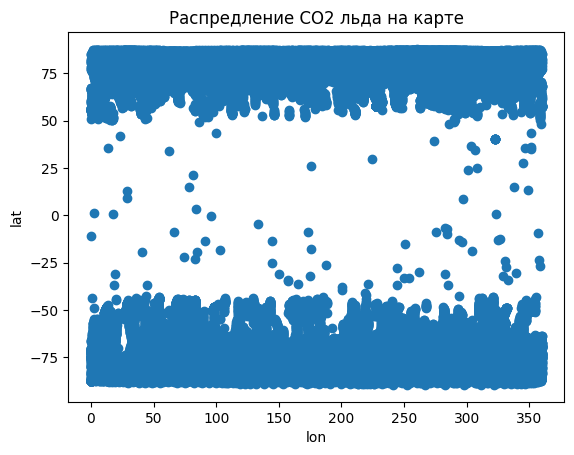

In [15]:
plt.scatter(x, y)
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Распредление CO2 льда на карте')
plt.show()

Радует, что получилось то, что больше похоже на правду. Значит, посчиталось всё правильно

Попробуем теперь сделать всё то же самое, но с водяным льдом:

In [16]:
x = []
y = []
for i in range(len(df)):
    if df.iloc[i]['h2oice_index'] > 0.15:
        # Сюда попадаем, когда детектируем лёд, поэтому сохраняем новые координаты
        x.append(df.iloc[i]['lon'])
        y.append(df.iloc[i]['lat'])

Смотрим на график:

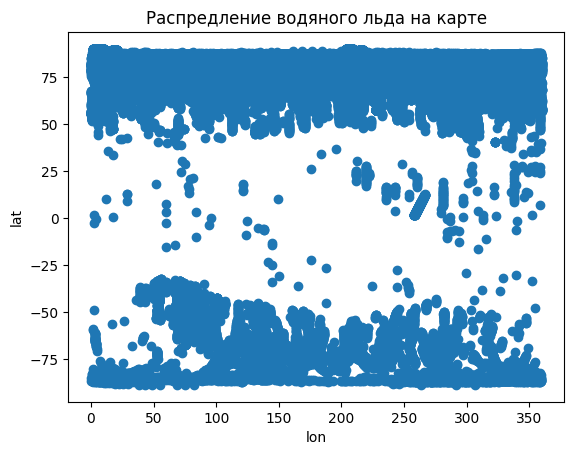

In [17]:
plt.scatter(x, y)
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Распредление водяного льда на карте')
plt.show()

Попробуем построить функцию, которая по марсианскому году строит карту распределения водяных льдов

In [18]:
def create_plot_h2oice_year(df, year):
    x = []
    y = []
    for i in range(len(df)):
        # Пропускаем данные, когда год не тот, который просят
        if df.iloc[i]['martian_year'] != year:
            continue
        if df.iloc[i]['h2oice_index'] > 0.15:
            x.append(df.iloc[i]['lon'])
            y.append(df.iloc[i]['lat'])
    plt.scatter(x, y)
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.title('Распредление водяного льда на карте в марсианский год, равный {}'.format(year))
    plt.show()

Попробуем посмотреть, что из этого выйдет:

In [22]:
list(set(df['martian_year'].tolist()))

[32, 33, 34, 35, 27, 28, 29, 30, 31]

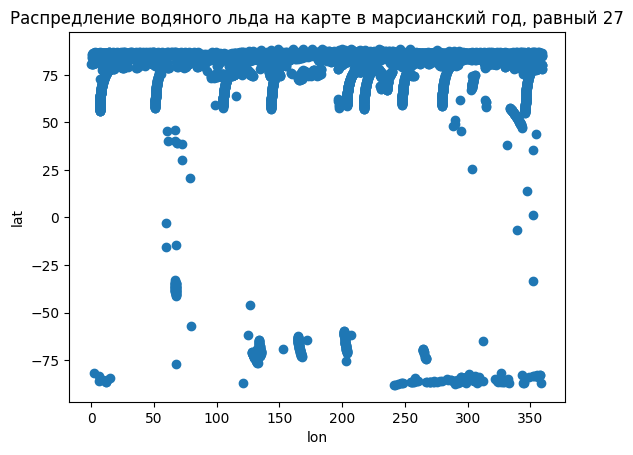

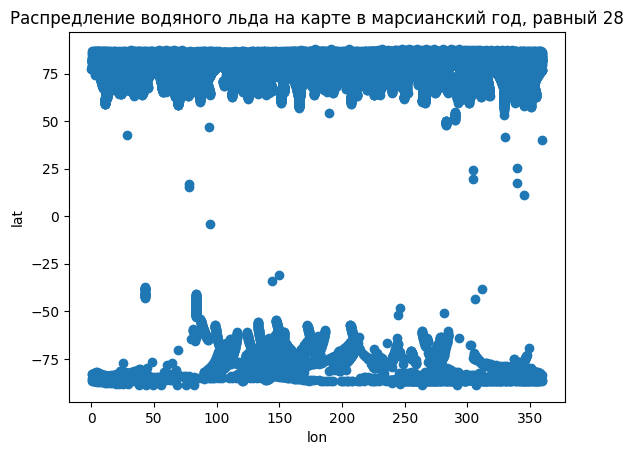

In [23]:
create_plot_h2oice_year(df, 27)
create_plot_h2oice_year(df, 28)

Видим, например, что в соседние годы распределение льдов сильно отличается!

Ещё можем заметить, что на южной полярной шапке меньше льда в среднем

Давайте теперь попробуем найти области, где водяной лёд находился хотя бы один раз каждый год

Для этого тоже буду строить функцию, которую можно спокойно использовать для любого года

In [31]:
def create_plot_constant_h2oice_year(df, year):
    # Для этого выберем все координаты
    coordinates_where_was_ice = set()
    for i in range(len(df)):
        if df.iloc[i]['martian_year'] != year:
            continue
        if df.iloc[i]['h2oice_index'] > 0.15:
            x = df.iloc[i]['lon']
            y = df.iloc[i]['lat']
            # Будем по координате льда добавлять присутствие льда в ближайших целых координатах, чтобы потом можно было более нормально определять, где есть лёд
            coordinates_where_was_ice.add((math.ceil(x), math.ceil(y)))
            coordinates_where_was_ice.add((math.floor(x), math.floor(y)))
            coordinates_where_was_ice.add((math.ceil(x), math.floor(y)))
            coordinates_where_was_ice.add((math.floor(x), math.ceil(y)))
    # Будем выводить усреднённые координаты, где был водяной лёд
    return coordinates_where_was_ice

Посмотрим, какие марсианские года у нас вообще есть:

In [32]:
years = list(set(df['martian_year'].to_list()))
years

[32, 33, 34, 35, 27, 28, 29, 30, 31]

Теперь посмотрим на координаты, когда всегда был лёд:

In [33]:
coordinates_where_always_was_ice = set()
for lat in range(-90, 91):
    for lon in range(0, 361):
        coordinates_where_always_was_ice.add((lon, lat))
for year in years:
    current_coordinates = create_plot_constant_h2oice_year(df, year)
    coordinates_where_always_was_ice = coordinates_where_always_was_ice & current_coordinates

Построим теперь графики, когда всегда был лёд каждый год хотя бы по одному разу:

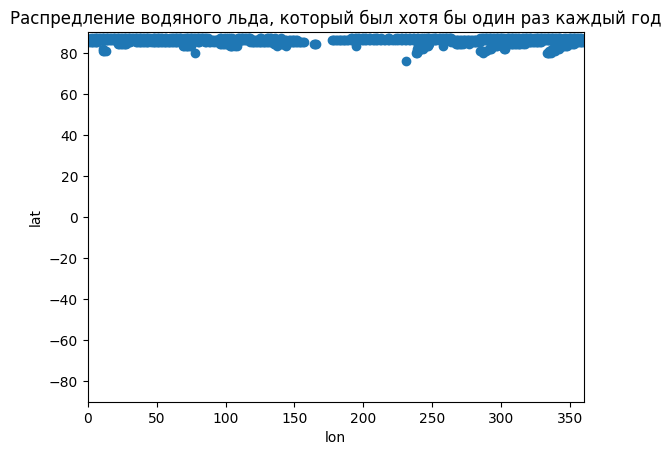

In [37]:
x = []
y = []
for (lon, lat) in coordinates_where_always_was_ice:
    x.append(lon)
    y.append(lat)
plt.scatter(x, y)
plt.xlabel('lon')
plt.ylabel('lat')
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.title('Распредление водяного льда, который был хотя бы один раз каждый год')
plt.show()

Видим, что в южной шапке не было ни одной точки, которая бы имела водяной лёд хотя бы раз каждый год на протяжении всего датасета! При этом, на самом севере сохраняется стабильная часть

Давайте попробуем сделать гифку того, как менялось распределение водяных льдов только в зависимости от времени года

In [45]:
# Здесь для каждого ls будем брать его целую часть снизу, чтобы можно было как бы разбить весь год на 360 частей для удобства графиков
year_to_ice_distribution = dict()
for part_ls in range(360):
    year_to_ice_distribution[part_ls] = list()
for i in range(len(df)):
    if df.iloc[i]['h2oice_index'] > 0.15:
        # Заранее высчитываем целый ls
        ls = math.floor(df.iloc[i]['ls'])
        year_to_ice_distribution[ls].append([df.iloc[i]['lon'], df.iloc[i]['lat']])

Теперь построим функцию, которая по заданному ls от 0 до 359 будет строить график распределения и сохранять его в ls_x.jpg в зависимости от ls. Потом, когда будет 360 таких фоток, их можно будет сделать в гифку.

In [65]:
def save_plot_of_ls(ls, year_to_ice_distribution):
    # Сначала подготавливаем точки для графика
    x = []
    y = []
    for point in year_to_ice_distribution[ls]:
        x.append(point[0])
        y.append(point[1])
    plt.scatter(x, y)
    plt.xlim(0, 360)
    plt.ylim(-90, 90)
    plt.title('График льда на время года {}/360'.format(ls))
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.savefig('ls_{}.png'.format(ls))
    plt.close()

Создадим теперь отдельных 360 фото:

In [66]:
for ls in range(360):
    save_plot_of_ls(ls, year_to_ice_distribution)

Я посмотрел и у меня и вправду создалось 360 фото в сессионном хранилище. Теперь осталось сделать гифку из данных фото:

Тут я погуглил и нашёл неплохую статью, в которой подробно описывают, как создавать гифки (https://python-scripts.com/create-gif-in-pil?ysclid=m2nyrbhtub185400049)

In [74]:
frames = []
for ls in range(360):
    frame = Image.open('ls_{}.png'.format(ls))
    frames.append(frame)

frames[0].save(
    'ls.gif',
    save_all=True,
    append_images=frames[1:],
    optimize=True,
    duration=0.75,
    loop=0
)

Выведем гифку, которая получилась:

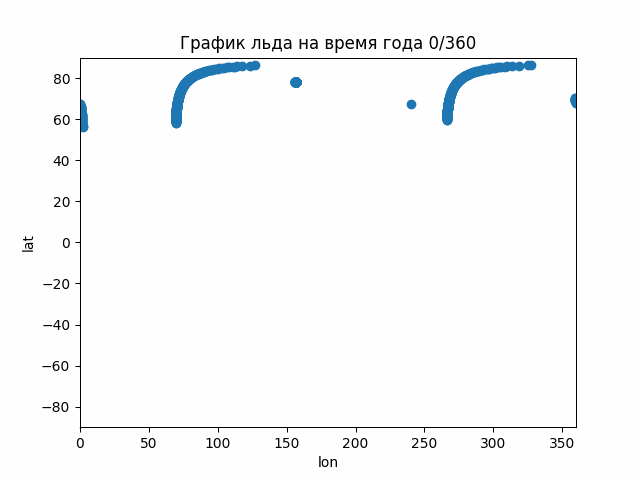

In [78]:
Image(filename='ls.gif')

Здорово! Как итог, водяной лёд в основном сосредточён на северной шапке. На южной шапке появляются какие-то льды только на середине года и всё

А так ещё из предыдущих экспериментов мы знаем, что водяной лёд каждый раз в год появляется хотя бы один раз только около северной шапки